In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

# Add the directory containing your module to sys.path
module_path = os.path.abspath(os.path.join('..', r"A:\Users\mtthl\Documents\Education\ME5653_CFD\git\me5653_CFD_repo\code\lib" ))
sys.path.append(module_path)

from distributedObjects import *
from distributedFunctions import *

factorial_numba(1)



1

# (2)

This portion of the homework will be re-done for a re-submission. 

In this case, we will be looking at a hyperbolic tangent (tanh) function. In this case, I do not know what the derivative is off-hand, so we will simply be plotting the data.

We are interested in the same 1st derivative gradient from previously in HW1 (1).



In [2]:
gradient_a = numericalGradient( 1 , ( 2 , 2 ) )

In [3]:
N = 1000
k_s = [ 1 , 5 , 20 ]

x_s = [0] * len( k_s )
u_s = [0] * len( k_s )
du_dx_s = [0] * len( k_s )
for i , k in enumerate( k_s ):
    x = np.linspace( 0 , 5 , num = N )
    u = np.tanh( k * x - 1 )
    du_dx = k * ( np.cosh( k * x - 1 ) ** -2 )
    x_s[i] = x
    u_s[i] = u
    du_dx_s[i] = du_dx



(0.001, 5)

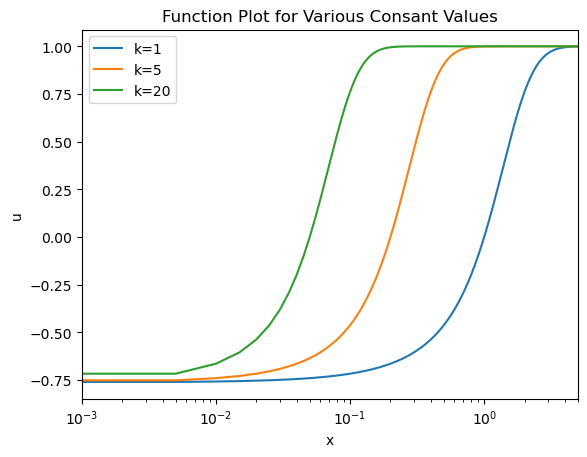

In [4]:
for i , k in enumerate( k_s ):
    plt.semilogx( x_s[i] , u_s[i] , label = 'k={x}'.format(x=k) )

plt.title("Function Plot for Various Consant Values")
plt.xlabel('x')
plt.ylabel('u')
plt.legend( loc = 'best' )
plt.xlim((1e-3,5))


This is a pretty interesting function. I've never seen this before.


In [5]:
du_dx_calcs = [0] * len( k_s )
TE_s = [0] * len( k_s )
net_TE = []
for i , k in enumerate( k_s ):
    du_dx = gradient_a.gradientCalc( x_s[i] , u_s[i] )
    TE = du_dx_s[i] - du_dx
    du_dx_calcs[i] = du_dx
    TE_s[i] = TE
    net_TE += [np.sum( TE )]


(0.01, 5)

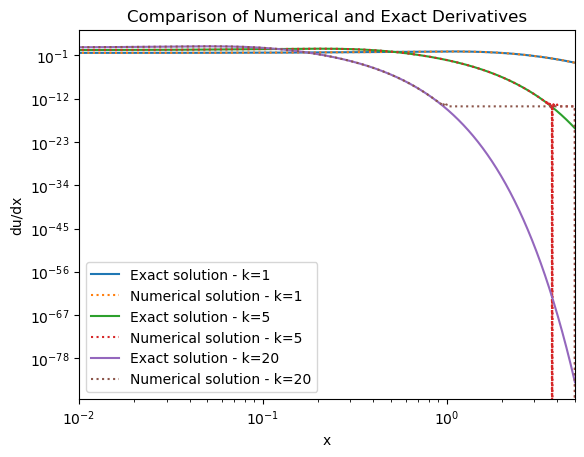

In [6]:
colors = ['r','g','b']
for i , k in enumerate( k_s ):
    plt.loglog( x_s[i] , du_dx_s[i] , label = "Exact solution - k={x}".format(x=k) )
    plt.loglog( x_s[i] , du_dx_calcs[i] , ":" , label = "Numerical solution - k={x}".format(x=k) )

plt.legend( loc = 'best' )
plt.xlabel('x')
plt.ylabel("du/dx")
plt.title("Comparison of Numerical and Exact Derivatives")\

plt.xlim((1e-2,5))


Clearly the numerical solutions for 100 points is pretty close. At the left edge, there is clearly no edge effects, which is kind of interesting. The right edge has an edge effect.


Text(0.5, 1.0, 'Truncation Error for Various Consants')

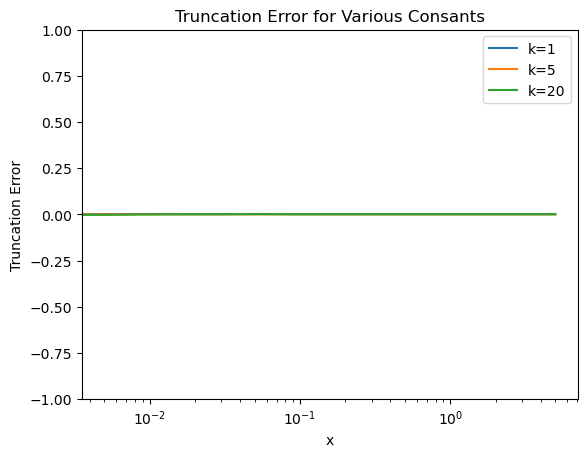

In [7]:
for i , k in enumerate( k_s ):
    plt.semilogx( x_s[i] , TE_s[i] , label = "k={x}".format(x=k) )

plt.legend( loc = "best" )
plt.ylabel("Truncation Error")
plt.xlabel("x")
plt.ylim((-1,1))
plt.title("Truncation Error for Various Consants")


In [8]:
#N_s = np.logspace( 1 , 4 , num = 1000 , dtype = np.int64 )
N_s = 10 * ( 2 ** ( np.arange( 0 , 7 ) ) )
#N_s = 10 * np.arange( 1 , 50 )
k_s = [ 1 , 5 , 20 ]

net_TE_s = np.zeros((len(N_s),len(k_s)))
rms_TE_s = np.zeros((len(N_s),len(k_s)))
for j , N in enumerate( N_s ):

    

    x_s = [0] * len( k_s )
    u_s = [0] * len( k_s )
    du_dx_s = [0] * len( k_s )
    du_dx_calcs = [0] * len( k_s )
    TE_s = [0] * len( k_s )
    net_TE = []
    rms_TE = []
    for i , k in enumerate( k_s ):
        #x = np.logspace( -12 , np.log10( 5 ) , num = N )
        x = np.linspace( 0 , 5 , num = N )
        u = np.tanh( k * x - 1 )
        du_dx = k * ( np.cosh( k * x - 1 ) ** -2 )
        x_s[i] = x
        u_s[i] = u
        du_dx_s[i] = du_dx
        du_dx = gradient_a.gradientCalc( x_s[i] , u_s[i] )
        TE = np.abs( du_dx_s[i] - du_dx )
        du_dx_calcs[i] = du_dx
        TE_s[i] = TE
        net_TE += [np.sum( TE )]
        rms_TE += [np.sqrt( np.sum( TE ** 2 ) / len( TE ) )]
        net_TE_s[j,i] = np.sum( TE )
        rms_TE_s[j,i] = np.sqrt( np.sum( TE ** 2 ) / len( TE ) )


In this case we are looking at the gradient for a number of points:


In [9]:
N_s


array([ 10,  20,  40,  80, 160, 320, 640])

Text(0.5, 1.0, 'Convergence Plot')

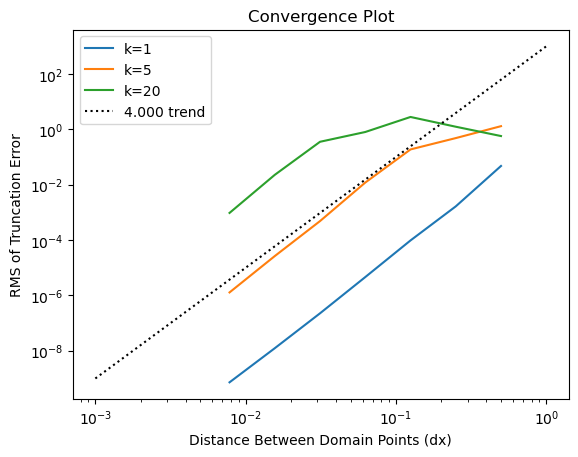

In [10]:
for i , k in enumerate( k_s ):
    plt.loglog( np.max( x_s ) / N_s , rms_TE_s[:,i] , label = "k={x}".format(x=k) )

#
# Plot trend
#
a = 4
y0 = 1e-9
x = np.logspace( -3 , 0 , num = 10 )
b = y0 / ( x[0] ** a )
y = b * ( x ** a )
plt.loglog( x , y , ":k" , label = "{x:.3f} trend".format(x=a) )

plt.legend( loc = "best" )
plt.xlabel("Distance Between Domain Points (dx)")
plt.ylabel("RMS of Truncation Error")

plt.title( "Convergence Plot" )


Now, although the data does not follow a smooth trend perfectly, but it's pretty close.

Let's do a least squared fit of the function to all the points that are plotted.



In [11]:
import scipy.optimize as sopt

def powerFunction( x , a , b ):
    # Function that returns the power function to be called by things
    return b * ( x ** a )

popts = []
pcovs = []
for i in range( len( k_s ) ):

    xdata = np.asarray( list( np.max( x_s ) / N_s ) )
    ydata = net_TE_s[:,i]

    popt , pcov = sopt.curve_fit( powerFunction , xdata , ydata )
    popts += [popt]
    pcovs += [pcov]

print("The best fit slope is {x:.3f}".format(x=popt[0]))


The best fit slope is 0.146


Okay, I'm not sure what's happening there. We can clearly see that 4 is a better fit. Maybe I will have to mess with this more later.


In [12]:
popts


[array([3.71005235, 2.94609023]),
 array([0.92570846, 9.11340274]),
 array([0.14634852, 9.69158533])]

In [13]:
pcovs


[array([[0.00039696, 0.00081538],
        [0.00081538, 0.00168462]]),
 array([[0.01861372, 0.16255143],
        [0.16255143, 1.80887458]]),
 array([[ 0.09976086,  2.15471325],
        [ 2.15471325, 62.83658023]])]

It is interesting that the one with the lowest covariance is the best fit to the expected trend. I am going to have to work with this some more.

If we go back to when we plotted the function, we can see that the mesh resolution makes a big difference because some of the regions of the curve are quite sharp. Due to a lack of mesh resolution, clearly the gradient in these regions will not be accurately represented in the numerical calculation if even the exact function cannot be accurately represented. We can see this in the convergence plots where the truncation error requires some threshold of mesh resolution to form the convergence trend that we expect based on the math from the Taylor series. This would be of concern in a typical analysis because our second coefficient function is barely even 1st order accurate, and k=20 is not even 1st order accurate. 
